### Neural Network Classification

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
# Common imports
import numpy as np
import pandas as pd
import os
# to make this notebook's output stable across runs
np.random.seed(42)
from sklearn.exceptions import DataConversionWarning
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
# To plot  figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay,roc_curve

#### A. Hyperparameter tuning

In [2]:
data= pd.read_csv('../Data/data_preprocessed.csv', index_col=0)
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.199101,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,7.060069,129.422921,18630.057858,6.635246,344.894384,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.706620,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
X_cols=['ph', 'Hardness','Solids','Chloramines','Conductivity','Trihalomethanes','Organic_carbon','Sulfate','Turbidity']
Y_col=['Potability']

In [4]:
#spliting the dataset
X_train, X_test, y_train, y_test=train_test_split(data[X_cols],data[Y_col],random_state=42, test_size=0.25)

In [5]:
X_train_np=np.array(X_train)
y_train_np=np.array(y_train)
params=[
    {'hidden_layer_sizes': [[10, 10], [20, 10], [50, 10], [10, 20], [20, 20], [50, 20], [10, 50], [20, 50], [50, 50]],
     'alpha': [0.01, 0.1, 1, 10],
     'activation': ['tanh', 'relu', 'logistic']}]
scaler=MinMaxScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

make_gridsearch= GridSearchCV(MLPClassifier(max_iter=1000),params,n_jobs=-1,cv=10,verbose=2)

In [6]:
make_gridsearch.fit(X_train_scaled,y_train.values.ravel())
print(f"The best parameter: {make_gridsearch.best_params_}")
print(f"The best estimator: {make_gridsearch.best_estimator_}")
print(f"The best index: {make_gridsearch.best_index_}")
print(f"The best score: {make_gridsearch.best_score_}")

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
The best parameter: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': [50, 20]}
The best estimator: MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=[50, 20],
              max_iter=1000)
The best index: 5
The best score: 0.6713367739324024


#### B. Model evaluation

In [11]:
# build model
nnclf = MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=[50, 20],
              max_iter=1000)
nnclf.fit(X_train_scaled,y_train.values.ravel())

MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=[50, 20],
              max_iter=1000)

In [12]:
#testing
pred=nnclf.predict(X_test_scaled)
print("Classification Report: \n")
print(classification_report(y_test,pred))

Classification Report: 

              precision    recall  f1-score   support

           0       0.70      0.87      0.78       517
           1       0.61      0.36      0.45       294

    accuracy                           0.68       811
   macro avg       0.66      0.61      0.61       811
weighted avg       0.67      0.68      0.66       811



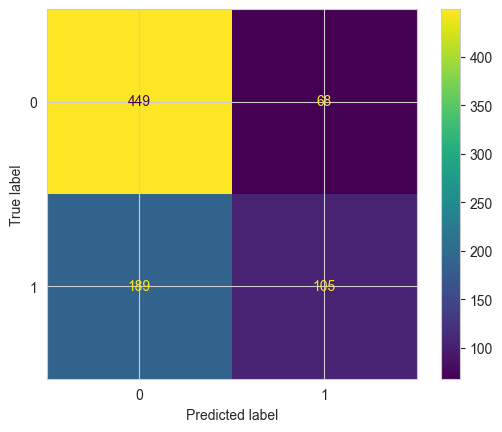

In [13]:
cm=confusion_matrix(y_test,pred)
display_cm=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= nnclf.classes_)
display_cm.plot()
plt.show()

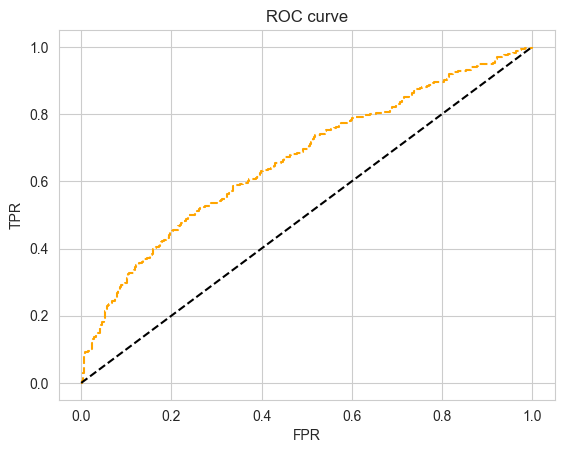

In [14]:
#plotting ROC curve
pred_proba=nnclf.predict_proba(X_test_scaled)
fpr,tpr,threshold=roc_curve(y_test,pred_proba[:,1], pos_label=1)
random_probs=[0 for i in range(len(y_test))]
p_fpr,p_tpr,_=roc_curve(y_test,random_probs,pos_label=1)
plt.plot(fpr,tpr,linestyle='--',color="orange",label='SVC')
plt.plot(p_fpr,p_tpr,linestyle='--',color='black')
plt.title("ROC curve")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()